In [1]:
import matplotlib.pyplot as plt
import numpy as np
from QuestionProcessor import QuestionProcessor
from json_types.Question import Question
from json_types.Answer import Answer
from json_types.Video import Video
from json_types.EModel import EModel
from typing import List, Tuple

question_processor = QuestionProcessor("./export.json")  

General Questions: 6
General Answers: 210


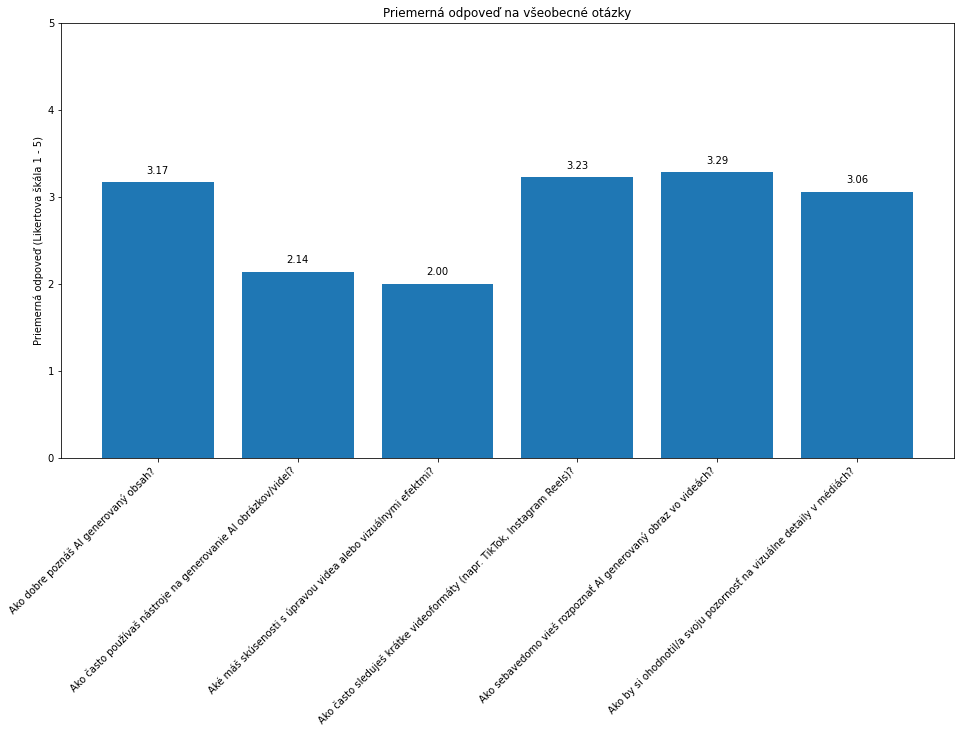

In [2]:
# Evaluate the general questions and answers

general_questions_and_answers = question_processor.get_general_questions_and_answers()
question_texts = []
question_averages = []

for qa in general_questions_and_answers:
    question = qa[0]
    answers = qa[1]

    values = [a['answer'] for a in answers]
    if values:
        average = sum(values) / len(values)
        question_averages.append(average)
        question_texts.append(question['titleSk'])
        
        
plt.figure(figsize=(16, 8))
bars = plt.bar(question_texts, question_averages)
plt.title("Priemerná odpoveď na všeobecné otázky")
plt.ylabel("Priemerná odpoveď (Likertova škála 1 - 5)")
plt.ylim(0, 5)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f"{yval:.2f}", ha='center')

plt.show()

In [ ]:
def calculate_ranking_avg(answers: list[Answer], videos: List[Video]) -> List[Tuple[str, float]]:
    """
    Calculate the average ranking for a given question and its answers.
    """
    # Create a dictionary to store the sum of ranks and the count of answers for each EModel
    rank_sums = {model.value: 0 for model in EModel if model != EModel.NONE}

    for answer in answers:
        ranking: List[str] = answer['answer']	

        if ranking is None:
            raise ValueError("Ranking is None")

        for video_id in ranking:
            video = next((v for v in videos if v['id'] == video_id), None)
            
            if video is None:
                raise ValueError(f"Video with ID {video_id} not found in videos list")

            rank_sums[video['model']] += ranking.index(video_id) + 1  # Add 1 to convert from 0-based index to rank
          
    # Calculate the average rank for each EModel
    rank_averages = []
    for model, sum_ranks in rank_sums.items():
        avg_rank = round(sum_ranks / len(answers), 2)
        rank_averages.append((model, avg_rank))
           
    return 

def sum_choice_answers(answers: list[Answer], videos: List[Video]) -> dict[str, int]:
    sums = {model.value: 0 for model in EModel if model != EModel.NONE}
    
    for answer in answers:
        chosen_video_id: str = answer['answer'][0]
        
        if chosen_video_id is None:
            raise ValueError("Chosen video ID is None")
        
        video = next((v for v in videos if v['id'] == chosen_video_id), None)
        
        if video is None:
            raise ValueError(f"Video with ID {chosen_video_id} not found in videos list")
        
        sums[video['model']] += 1  # Increment the coun
        
    return sums

def plot_ranking_avg(ranking_avg: List[Tuple[str, float]], question_text: str) -> None:
    plt.figure(figsize=(12, 6))
    plt.bar([model for model, _ in ranking_avg], [avg for _, avg in ranking_avg])
    plt.title(question_text)
    plt.xlabel("Model")
    plt.ylabel("Priemerné hodnotenie (1 - 5)")
    plt.ylim(0, 5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
def plot_choice_sums(sums: dict[str, int], question_text: str) -> None:
	plt.figure(figsize=(12, 6))
	plt.bar(sums.keys(), sums.values())
	plt.title(question_text)
	plt.xlabel("Model")
	plt.ylabel("Počet odpovedí")
	plt.xticks(rotation=45, ha='right')
	plt.tight_layout()
	plt.show()
    
def process_ranking_video_question(question_id: str) -> None:
	"""
	Process a video question and plot the average ranking for each EModel.
	"""
	prompt_allignment_q_a = question_processor.get_question_by_id_and_answers(question_id)
	question_videos = question_processor.get_videos_by_question_id(question_id)

	rank_avgs = calculate_ranking_avg(prompt_allignment_q_a[1], question_videos)
	plot_ranking_avg(rank_avgs, prompt_allignment_q_a[0]['titleSk'])
	print(rank_avgs)
 
def process_choice_video_question(question_id: str) -> None:
	prompt_allignment_q_a = question_processor.get_question_by_id_and_answers(question_id)
	question_videos = question_processor.get_videos_by_question_id(question_id)
	sums = sum_choice_answers(prompt_allignment_q_a[1], question_videos)
	print(sums)
 
	plot_choice_sums(sums, prompt_allignment_q_a[0]['titleSk'])

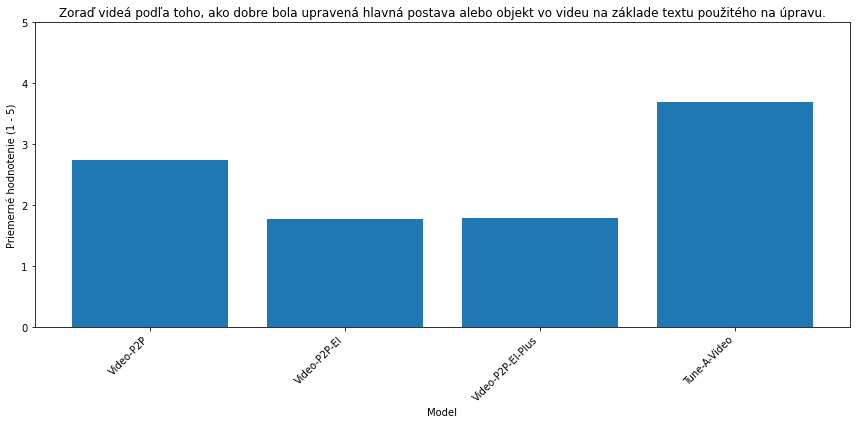

[('Video-P2P', 2.74), ('Video-P2P-EI', 1.77), ('Video-P2P-EI-Plus', 1.8), ('Tune-A-Video', 3.69)]


In [ ]:
# Evaluate first video question (prompt allignment)
question_id = "dGltjzC0vpeHDQwjXgf9"
process_ranking_video_question(question_id)

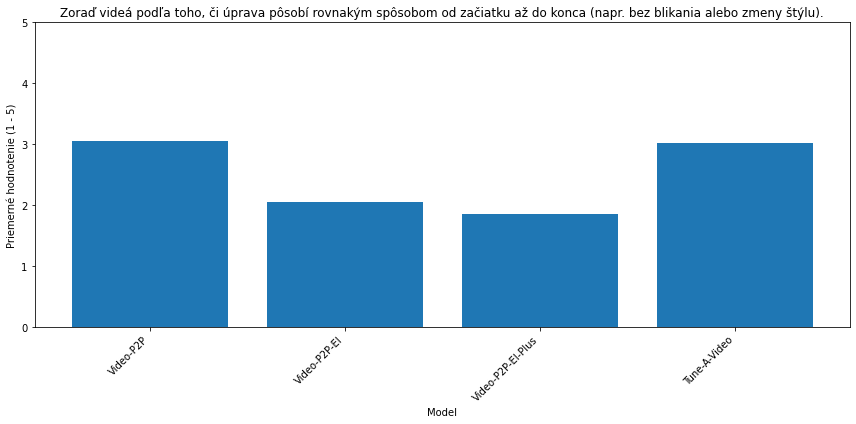

[('Video-P2P', 3.06), ('Video-P2P-EI', 2.06), ('Video-P2P-EI-Plus', 1.86), ('Tune-A-Video', 3.03)]


In [ ]:
# Evaluate second video question (temporal consistency)
question_id = "Sb0CCXKj1iwNIU0E8Yyr"
process_ranking_video_question(question_id)

In [41]:
# Evaluate third video question (scene preservation)
question_id = "LW3dqYChtj97M9AidV6z"
process_choice_video_question(question_id)

{'Video-P2P': 4, 'Video-P2P-EI': 10, 'Video-P2P-EI-Plus': 14, 'Tune-A-Video': 7}


ValueError: too many values to unpack (expected 2)

<Figure size 864x432 with 0 Axes>